<a href="https://colab.research.google.com/github/PoetriHeriningtyas/sentiment-analysis-vader/blob/main/dm_anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load Data <br>
Load json data from google drive and convert to dataframe. The output will have columns for - sender's name, date, time and conversation messages.
3. Clean Data <br>
Drop missing values in text and clean text.
4. Analyze Data <br>
Analyze the conversation over 2020 and focus on product "No Eye Deer" Roasted Tomato & Shiitake Sauce. 

##1. Load Data<br>
Mount Google drive to Colab then make the directory of the file to current directory. Load JSON file then convert it to table format which have columns for sender's name, date, time and conversation.

In [ ]:
# Load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/haruplate_task")

In [ ]:
!ls

 cleaned_messages.json	    messages.json
 cleaned_messages.xlsx	    noeyedeer_cleaned_piechart.png
'Copy of dm_analysis.png'   noeyedeer_ori_piechart.png
 dm_analysis.drawio	    noyedeer_cleaned_final_piechart.png
 ig_dm_analysis.gslides     sentiment_experiment.xlsx


In [ ]:
!pip install xlsxwriter

In [ ]:
!pip install openpyxl

In [ ]:
!pip install wordcloud

In [ ]:
# setup library
import numpy as np
import pandas as pd
import xlsxwriter
import openpyxl
import matplotlib.pyplot as plt
import json
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# display full information of dataframe
pd.set_option('display.max_colwidth', None)

In [ ]:
# open json file 
def open_json(file_name):
  with open(file_name, 'r', encoding="utf8" ) as f:
    data = json.load(f)
  return data

In [ ]:
# call open_json function
data = open_json('messages.json')

In [ ]:
# convert json to dataframe
def json_to_df(data):
  df = pd.DataFrame(data)
  return df


In [ ]:
# call json_to_df function
df = json_to_df(data)
print(df)
print(list(df.columns))

                                participants                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
# create dataframe from list of dict
def listdict_to_df(col, spec_cols):
  conversations = col.values.tolist()
  data_convo = list()
  for convo in conversations:
    data_convo.extend(convo)
  df_convo = pd.DataFrame(data_convo)
  df_convo = df_convo[spec_cols]
  return df_convo

In [ ]:
# call listdict_to_df function
df_convo = listdict_to_df(df['conversation'],['sender','created_at','text'])
print(df_convo)

             sender  ...                                                                                                                                               text
0            xileah  ...                                                                                                                       Hi! How to order ur product?
1         haruplate  ...                                                                                                                           i hope he enjoys it!! ❤️
2      angelinahs26  ...                                                                                                                                               None
3         haruplate  ...                                                                                                                                               None
4         haruplate  ...                                                                                                                    

In [ ]:
#convert isoformat to date and time
def isoformat_to_datetime(df):
  df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=True)
  df['date'] = pd.to_datetime(df['created_at'], format='%y:%m:%d').dt.date
  df['time'] = pd.to_datetime(df['created_at'], format='%H:%M:%S').dt.time
  df = df.drop(columns=['created_at'])
  return df

In [ ]:
# call isoformat_to_datetime function
df_convo = isoformat_to_datetime(df_convo)

In [ ]:
df_convo

,sender,text,date,time
0,xileah,Hi! How to order ur product?,2020-08-18,16:40:42.043611
1,haruplate,i hope he enjoys it!! ❤️,2020-08-18,10:48:50.012663
2,angelinahs26,None,2020-08-18,09:40:04.511923
3,haruplate,None,2020-08-18,06:22:49.707222
4,haruplate,None,2020-08-18,06:21:51.354730
...,...,...,...,...
18895,haruplate,"i wanted to find out how the flea was yesterday, how was the crowd and foot traffic.",2018-05-20,11:27:53.680566
18896,haruplate,"hi sandy! saw the drama that's been going on, hope you're feeling better 🌻",2018-05-20,11:25:35.410170
18897,haruplate,"Hi, I think you should be more mindful and respectful of spamming sales leads on other people's posts. Especially if it's other businesses.",2018-05-09,04:44:20.277316
18898,haruplate,"Your comment was completely not relevant to our post, and well, it just comes across as being spam.",2018-05-05,01:08:47.588550


##2. Clean Data

In [ ]:
# identify missing values in data
df_convo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sender  18900 non-null  object
 1   text    16869 non-null  object
 2   date    18900 non-null  object
 3   time    18900 non-null  object
dtypes: object(4)
memory usage: 590.8+ KB


In [ ]:
# select data where text is empty
df_convo[df_convo['text'].isna()]

,sender,text,date,time
2,angelinahs26,None,2020-08-18,09:40:04.511923
3,haruplate,None,2020-08-18,06:22:49.707222
4,haruplate,None,2020-08-18,06:21:51.354730
5,haruplate,None,2020-08-18,05:40:49.738980
6,haruplate,None,2020-08-18,02:21:18.465016
...,...,...,...,...
18812,ripplesim,None,2018-07-07,07:23:12.463737
18813,wineanddinemag,None,2018-07-07,02:20:49.937958
18837,growingwiththetans,None,2018-07-03,06:01:09.036387
18849,teamjuicy99,None,2018-07-01,02:41:11.358601


In [ ]:
# delete missing values
df_convo.dropna(inplace=True)
df_convo.reset_index(drop=True, inplace=True)

In [ ]:
df_convo

,sender,text,date,time
0,xileah,Hi! How to order ur product?,2020-08-18,16:40:42.043611
1,haruplate,i hope he enjoys it!! ❤️,2020-08-18,10:48:50.012663
2,hellooomama_,And i think my greenery view kinda helped me survive CB period with 2 young kids 🤣🤣🤣,2020-08-17,14:40:02.200571
3,hellooomama_,Yep! Its a quiet area. A little distance from amenities but at least its away from the crowd haha,2020-08-17,14:39:40.013069
4,haruplate,heh are yiu enjoying that area?,2020-08-17,14:38:35.511606
...,...,...,...,...
16864,haruplate,"i wanted to find out how the flea was yesterday, how was the crowd and foot traffic.",2018-05-20,11:27:53.680566
16865,haruplate,"hi sandy! saw the drama that's been going on, hope you're feeling better 🌻",2018-05-20,11:25:35.410170
16866,haruplate,"Hi, I think you should be more mindful and respectful of spamming sales leads on other people's posts. Especially if it's other businesses.",2018-05-09,04:44:20.277316
16867,haruplate,"Your comment was completely not relevant to our post, and well, it just comes across as being spam.",2018-05-05,01:08:47.588550


In [ ]:
# tokenize keywords
df_convo["cleaned_text"] = df_convo["text"].apply(nltk.word_tokenize)

In [ ]:
# add stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
new_stopwords = ['hi','heh','ur','yiu','yep','sorry']
stop_words.extend(new_stopwords)
stop_words = list(set(stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# clean text 
# convert to lowercase
# remove punctuation from each word
# filter out remaining tokens that are not alphabetic
# filter out tokens that are stop words
# lemmatization
def clean_text(txt):
    # convert to lower case
    txt = [w.lower() for w in txt]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    txt = [w.translate(table) for w in txt]
    # remove remaining tokens that are not alphabetic
    txt = [word for word in txt if word.isalpha()]
    # filter out stop words
    txt = [w for w in txt if not w in stop_words]
    # lemmatize
    nltk.download('wordnet')
    word_lemma = WordNetLemmatizer()
    txt = [word_lemma.lemmatize (w) for w in txt]
    # stemming
    # ps = PorterStemmer()
    # txt = [ps.stem (w) for w in txt]
    # reform text
    txt = " ".join(txt)
    return txt

In [ ]:
# apply text to clean text method
df_convo['cleaned_text'] = df_convo['cleaned_text'].apply(clean_text)

Streaming output truncated to the last 5000 lines.
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet

In [ ]:
df_convo

,sender,text,date,time,cleaned_text
0,xileah,Hi! How to order ur product?,2020-08-18,16:40:42.043611,order product
1,haruplate,i hope he enjoys it!! ❤️,2020-08-18,10:48:50.012663,hope enjoys
2,hellooomama_,And i think my greenery view kinda helped me survive CB period with 2 young kids 🤣🤣🤣,2020-08-17,14:40:02.200571,think greenery view kinda helped survive cb period young kid
3,hellooomama_,Yep! Its a quiet area. A little distance from amenities but at least its away from the crowd haha,2020-08-17,14:39:40.013069,quiet area little distance amenity least away crowd haha
4,haruplate,heh are yiu enjoying that area?,2020-08-17,14:38:35.511606,enjoying area
...,...,...,...,...,...
16864,haruplate,"i wanted to find out how the flea was yesterday, how was the crowd and foot traffic.",2018-05-20,11:27:53.680566,wanted find flea yesterday crowd foot traffic
16865,haruplate,"hi sandy! saw the drama that's been going on, hope you're feeling better 🌻",2018-05-20,11:25:35.410170,sandy saw drama going hope feeling better
16866,haruplate,"Hi, I think you should be more mindful and respectful of spamming sales leads on other people's posts. Especially if it's other businesses.",2018-05-09,04:44:20.277316,think mindful respectful spamming sale lead people post especially business
16867,haruplate,"Your comment was completely not relevant to our post, and well, it just comes across as being spam.",2018-05-05,01:08:47.588550,comment completely relevant post well come across spam


In [ ]:
# check duplicate rows
duplicate = df_convo[df_convo.duplicated()] 
print(duplicate)

Empty DataFrame
Columns: [sender, text, date, time, cleaned_text]
Index: []


In [ ]:
# save dataframe as JSON
# df_convo.to_json('cleaned_messages.json', orient='records')

In [ ]:
# save df as excel with adjusted column width
# create a Pandas Excel writer using XlsxWriter as the engine.

def df_to_excel_formatted (df, path, sheet, cols):
  writer = pd.ExcelWriter(path, engine='xlsxwriter')
  # convert the dataframe to an XlsxWriter Excel object.
  df.to_excel(writer, sheet_name=sheet)
  # get the xlsxwriter workbook and worksheet objects.
  workbook = writer.book
  worksheet = writer.sheets[sheet]
  # add some cell formats.
  format = workbook.add_format({'text_wrap': True})
  # set the column width
  worksheet.set_column(cols, 20, format)
  writer.save()

In [ ]:
# call df_to_excel_formatted function
#df_to_excel_formatted(df_convo, 'cleaned_messages.xlsx', 'Conversations','B:F')

##3. Analyze Data <br>
The analysis will be applied to 'No Eye Deer" Roasted Tomato and Shiitake Sauce product based on customer messages in year 2020. To see if customers like the product or not, unsupervised sentiment analysis will be performed. Why unsupervised? because the current data is unlabeled so we cant do supervised learning (machine learning) which is required training dataset to create a model. To train data, we need labeled dataset. This will need more time since it will be manual work to label each message one by one. Thus, unsupervised approached is the feasible way and a good start to get the preliminary result. Second analysis is to find how customer use the product.


###3.1 Sentiment Analysis<br>
Since the data is unlabeled, lexicon based sentiment analysis will be applied using VADER (Valence Aware Dictionary and sEntiment Reasoner) library. VADER is a lexicon and rule-based sentiment analysis tool. It is used to analyze the sentiment of a text. Lexicon is a list of lexical features (words) that are labeled with positive or negative based on the semantic meaning. In other words, unlabeled text data can be labeled with VADER sentiment analyzer.<br>

The goal is to find customer's respond about each of two products; "No Eye Deer" Roasted Tomato & Shiitake Sauce based on conversations in year 2020.

####3.1.1 No Eye Deer Roasted Tomato & Shiitake Sauce

In [ ]:
df_convo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16869 entries, 0 to 16868
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sender        16869 non-null  object
 1   text          16869 non-null  object
 2   date          16869 non-null  object
 3   time          16869 non-null  object
 4   cleaned_text  16869 non-null  object
dtypes: object(5)
memory usage: 659.1+ KB


In [ ]:
df_convo['date'] = pd.to_datetime(df_convo['date'])
df_convo['date']
df_convo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16869 entries, 0 to 16868
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   sender        16869 non-null  object        
 1   text          16869 non-null  object        
 2   date          16869 non-null  datetime64[ns]
 3   time          16869 non-null  object        
 4   cleaned_text  16869 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 659.1+ KB


In [ ]:
# lower string of original text
df_convo["text"] = df_convo["text"].str.lower()

In [ ]:
# filter messages where text contains "no eye deer roasted tomato" and date year is 2020
df_convo_noeyedeer = df_convo.loc[(df_convo["cleaned_text"].str.contains("no eye deer|eye deer|no eye deer roasted tomato|eye deer roasted tomato|roasted tomato|roasted tomato sauce|tomato sauce|shiitake sauce", na=False)) & (df_convo['date'].dt.year == 2020)& (df_convo['sender']!='haruplate')]

In [ ]:
df_convo_noeyedeer

,sender,text,date,time,cleaned_text
1479,annagisele,"hi, how long can i keep the tomato sauces in the fridge once opened?",2020-07-19,12:41:45.741610,long keep tomato sauce fridge opened
1646,jasminetanhy,only didi has tried the tomato sambal so far! my elder girl used to eat a lot of the tomato and shiitake sauce previously! :),2020-07-13,10:11:06.039521,didi tried tomato sambal far elder girl used eat lot tomato shiitake sauce previously
2324,eeelectricgirl,i have tried the no eye deer,2020-06-06,09:01:11.367239,tried eye deer
2534,pppraba,hi..i see that the spiced pumpkin and roasted tomato sauces can be kept in fridge for about 3 to 5 days. i dont think i will.be able to finish within 3 to 5 days. is it possible to freeze the sauce? will it be safe to eat? how long can i freeze them for?,2020-04-04,14:51:19.075922,hii see spiced pumpkin roasted tomato sauce kept fridge day dont think willbe able finish within day possible freeze sauce safe eat long freeze
3077,phyquean,yeah i regret not buying that for myself haha i only have the no eye deer,2020-06-06,06:53:56.698482,yeah regret buying haha eye deer
3222,qingyunn,"hi can i check, how long can i store the ""no eye deer"" in the fridge after opening?",2020-06-18,09:53:40.888765,check long store eye deer fridge opening
3567,__amanddaa,yes i got all in each flavour! except for the pumpkin one bc we're avoiding yellow food for asher😆 he's going to have the roasted tomato sauce for lunch!!,2020-04-19,03:42:00.562529,yes got flavour except pumpkin one bc avoiding yellow food going roasted tomato sauce lunch
3581,ezzyzan,roasted tomato,2020-06-12,11:04:58.601989,roasted tomato
4600,pinxius,"thank you! yes, my toddler loves the sambal 😊 wld like to try the no eye deer too",2020-06-04,15:20:30.208984,thank yes toddler love sambal wld like try eye deer
5271,_mswee,hello! i just received my order \nbut i wld like to check how come i only received 1 set of what i ordered? \n\ni thought there was a promo 1 for 1? \nor did i interprete the promo wrongly?\n\nmy order was haru platter x 1 & shiitake sauce x 1,2020-03-12,13:41:46.820439,hello received order wld like check come received set ordered thought promo interprete promo wrongly order haru platter x shiitake sauce x


In [ ]:
df_convo_noeyedeer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1479 to 10093
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   sender        26 non-null     object        
 1   text          26 non-null     object        
 2   date          26 non-null     datetime64[ns]
 3   time          26 non-null     object        
 4   cleaned_text  26 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.2+ KB


In [ ]:
# function to get sentiment scores
def sentiment_scores (df, txt):
  analyzer = SentimentIntensityAnalyzer()
  sentiment = txt.apply(lambda x: analyzer.polarity_scores(x))
  if not pd.Series(['neg', 'neu', 'pos', 'compound', 'sentiment']).isin(df.columns).all():
    df = pd.concat([df,sentiment.apply(pd.Series)],1)
  conditions = [(df['compound'] >= 0.05), (df['compound'] <= - 0.05)]
  values = ['positive','negative']
  df['sentiment'] = np.select(conditions, values, 'neutral')
  if not pd.Series(['sentiment']).isin(df.columns).all():
    df = pd.concat([df, df['sentiment']],1)
  return df

In [ ]:
# call sentiment_scores function
df_convo_noeyedeer = sentiment_scores(df_convo_noeyedeer, df_convo_noeyedeer['cleaned_text'])

In [ ]:
df_convo_noeyedeer

,sender,text,date,time,cleaned_text,neg,neu,pos,compound,sentiment
1479,annagisele,"hi, how long can i keep the tomato sauces in the fridge once opened?",2020-07-19,12:41:45.741610,long keep tomato sauce fridge opened,0.000,1.000,0.000,0.0000,neutral
1646,jasminetanhy,only didi has tried the tomato sambal so far! my elder girl used to eat a lot of the tomato and shiitake sauce previously! :),2020-07-13,10:11:06.039521,didi tried tomato sambal far elder girl used eat lot tomato shiitake sauce previously,0.000,1.000,0.000,0.0000,neutral
2324,eeelectricgirl,i have tried the no eye deer,2020-06-06,09:01:11.367239,tried eye deer,0.000,1.000,0.000,0.0000,neutral
2534,pppraba,hi..i see that the spiced pumpkin and roasted tomato sauces can be kept in fridge for about 3 to 5 days. i dont think i will.be able to finish within 3 to 5 days. is it possible to freeze the sauce? will it be safe to eat? how long can i freeze them for?,2020-04-04,14:51:19.075922,hii see spiced pumpkin roasted tomato sauce kept fridge day dont think willbe able finish within day possible freeze sauce safe eat long freeze,0.000,0.798,0.202,0.5106,positive
3077,phyquean,yeah i regret not buying that for myself haha i only have the no eye deer,2020-06-06,06:53:56.698482,yeah regret buying haha eye deer,0.255,0.273,0.473,0.3400,positive
3222,qingyunn,"hi can i check, how long can i store the ""no eye deer"" in the fridge after opening?",2020-06-18,09:53:40.888765,check long store eye deer fridge opening,0.000,1.000,0.000,0.0000,neutral
3567,__amanddaa,yes i got all in each flavour! except for the pumpkin one bc we're avoiding yellow food for asher😆 he's going to have the roasted tomato sauce for lunch!!,2020-04-19,03:42:00.562529,yes got flavour except pumpkin one bc avoiding yellow food going roasted tomato sauce lunch,0.133,0.718,0.149,0.0772,positive
3581,ezzyzan,roasted tomato,2020-06-12,11:04:58.601989,roasted tomato,0.000,1.000,0.000,0.0000,neutral
4600,pinxius,"thank you! yes, my toddler loves the sambal 😊 wld like to try the no eye deer too",2020-06-04,15:20:30.208984,thank yes toddler love sambal wld like try eye deer,0.000,0.335,0.665,0.8979,positive
5271,_mswee,hello! i just received my order \nbut i wld like to check how come i only received 1 set of what i ordered? \n\ni thought there was a promo 1 for 1? \nor did i interprete the promo wrongly?\n\nmy order was haru platter x 1 & shiitake sauce x 1,2020-03-12,13:41:46.820439,hello received order wld like check come received set ordered thought promo interprete promo wrongly order haru platter x shiitake sauce x,0.000,0.884,0.116,0.3612,positive


In [ ]:
# save result of experiment in excel
#df_to_excel_formatted(df_convo_noeyedeer, 'sentiment_experiment.xlsx', 'noeyedeer_ori_text','B:K')

In [ ]:
# add new sheet
def add_new_sheet(path, new_df, sheet):
  with pd.ExcelWriter(path, engine='openpyxl', mode='a') as writer:
    #df_to_excel_formatted(new_df, path, sheet, cols)  
    new_df.to_excel(writer, sheet_name=sheet)

In [ ]:
# add new experiment result to excel sheet
#add_new_sheet('sentiment_experiment.xlsx', df_convo_noeyedeer, 'noeyedeer_cleaned_text_final')

VADER will return a dictionary of 4 scores for any text; Positive, Neutral, Negative, and Compound scores, all ranging from -1 to 1. The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). Below is the standard scoring metric followed by most of the analyzers.<br>
<ul>
<li>positive sentiment : (compound score >= 0.05)</li>
<li>neutral sentiment : (compound score > -0.05) and (compound score < 0.05)</li>
<li>negative sentiment : (compound score <= -0.05)</li>
</ul>

In [ ]:
# function convert value_counts() to a dataframe
def value_counts_df(df, cols):
  df_counts = pd.DataFrame(df[cols[0]].value_counts())
  df_counts = df_counts.reset_index()
  df_counts.columns = cols
  if not df_counts['sentiment'].str.contains('negative').any():
    df_counts = df_counts.append({'sentiment':'negative', 'counts':0}, ignore_index=True)
  elif not df_counts['sentiment'].str.contains('positive').any():
    df_counts = df_counts.append({'sentiment':'positive', 'counts':0}, ignore_index=True)
  elif not df_counts['sentiment'].str.contains('neutral').any():
    df_counts = df_counts.append({'sentiment':'neutral', 'counts':0}, ignore_index=True)
  return df_counts

In [ ]:
# count sentiment
df_sentiment_counts = value_counts_df (df_convo_noeyedeer, ['sentiment','counts'])

In [ ]:
df_sentiment_counts

,sentiment,counts
0,positive,13
1,neutral,13
2,negative,0


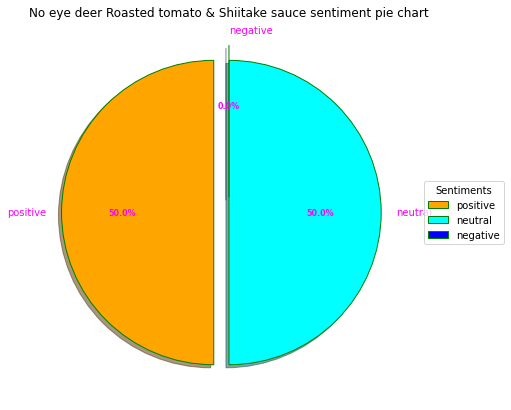

In [ ]:
# visualize the sentiment
  
# Creating explode data 
explode = (0.1, 0.0, 0.1) 
  
# Creating color parameters 
colors = ("orange", "cyan", 'blue') 

# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 

# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(df_sentiment_counts['counts'].values.tolist(),
                                  autopct = '%1.1f%%', 
                                  explode = explode,  
                                  labels = df_sentiment_counts['sentiment'].values.tolist(), 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict (color ="magenta")) 

# Adding legend 
ax.legend(wedges, df_sentiment_counts['sentiment'].values.tolist(), 
          title ="Sentiments", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 

plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("No eye deer Roasted tomato & Shiitake sauce sentiment pie chart") 

# show plot 
plt.show() 

I run [two experiment](https://drive.google.com/file/d/1-0QztTMs9ikVySZd40Nubg5sE27LvxAb/view?usp=sharing) of sentiment analysis using original text (only apply lower case) and cleaned text to see if punctuation mark like ?,! and any text cleaning would affect the sentiment score. Both of them returned the same amount of '2020 no eye deer roasted tomato and shiitake sauce' data and the exact same data. However they give different result on sentiment score. Original text sentiment score is 50% positive, 19.2% negative, 30.8% neutral. While cleaned text sentiment score is 50% positive, 7.7% negative, 42.3% neutral.<br>

<table style="width:100%">
  <tr>
    <th>Experiment</th>
    <th>Correct Predicted Positive</th>
    <th>Correct Predicted Negative</th>
    <th>Correct Predicted Neutral</th>
  </tr>
  <tr>
    <td>Original text</td>
    <td> 13 out of 17</td>
    <td>1 out of 1</td>
    <td>3 out of 8</td>
  </tr>
  <tr>
    <td>Cleaned text</td>
    <td>12 out of 17</td>
    <td>0 out of 1</td>
    <td>6 out of 8</td>
  </tr>
<table>

How convincing is the result?
I manually annotated 26 data to evaluate the VADER sentiment prediction. For positive sentiment on original text, 13 out 17 are correctly predicted. While on cleaned text, 12 out of 17 are correctly predicted. Most of the incorrectly predicted are predicted as neutral. There is one text (*only didi has tried the tomato sambal so far! my elder girl used to eat a lot of the tomato and shiitake sauce previously! :*)) that on ori text experiment is correctly predicted as positive while on cleaned text experiment is predicted as neutral. Also, there is one message (*is just the tomato shiitake sauce is crack and the bottle is sticky with visible sauce mark outside but not those dripping kind*)that on cleaned text experiment is falsely predicted as positive, it should be negative as in ori text experiment.<br>

<table style="width:100%">
  <tr>
    <th>Experiment</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1 score</th>
  </tr>
  <tr>
    <td>Original text</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>positive sentiment</td>
    <td>1</td>
    <td>0.76</td>
    <td>0.86</td>
  </tr>
  <tr>
    <td>negative sentiment</td>
    <td>0.125</td>
    <td>1</td>
    <td>0.22</td>
  </tr>
  <tr>
    <td>neutral sentiment</td>
    <td>0.6</td>
    <td>0.75</td>
    <td>0.67</td>
  </tr>
  <tr>
    <td>Cleaned text</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>positive sentiment</td>
    <td>0.92</td>
    <td>0.71</td>
    <td>0.80</td>
  </tr>
  <tr>
    <td>negative sentiment</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
  </tr>
  <tr>
    <td>neutral sentiment</td>
    <td>0.54</td>
    <td>0.75</td>
    <td>0.63</td>
  </tr>
<table>

Based on precision-recall table above, we can be sure of positive sentiment result which has accuracy around 80% on both experiment. The accuracy of neutral sentiment is not so good. It's because some neutral text that has word 'no eye deer' are predicted as negative because VADER recognize 'no' as negative word. Using non-clean text, more data will be falsely categorized as negative. I run one final experiment on cleaned text to add word 'sorry' in stopwords so that it wont be recognized as negative word by VADER. <br>

<table style="width:100%">
  <tr>
    <th>Experiment</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1 score</th>
  </tr>
  <tr>
    <td>Cleaned text final</td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>positive sentiment</td>
    <td>0.92</td>
    <td>0.71</td>
    <td>0.80</td>
  </tr>
  <tr>
    <td>negative sentiment</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>neutral sentiment</td>
    <td>0.67</td>
    <td>1</td>
    <td>0.80</td>
  </tr>
  <tr>
  </table>

Based on the table above, we increase the confidence of neutral sentiment significantly. But not for negative sentiment. As in all experiment the negative sentiment accuracy is low, we can conclude that VADER is not good to predict negative sentiment. However,  now we can be sure about the result of 50% customer give positive respond and 50% other are neutral. It means the customer in general like the no eye deer roasted tomato and shiitake sauce product.




**Conclusion**
1. Customers give good feedback about the product.
2. Label the unlabelled text data with VADER.
3. Reduces the manual effort.
4. Accuracy of the analysis sometimes can not be great.
5. VADER is not good for analyzing negative text.

**Future work**
1. Next analysis better use supervised learning. manually annotate or label the data before 2020 and use it as training data to create model prediction for the 2020 data or new data.
2. Apply RNN as ML agorithm to learn text in context. 
3. Explore any possibility of typo text when do text filtering by creating matching dictionary.
4. Create standardization rule for manual annotation what positive sentiment means, as well as negative and neutral. For example if the message is question about the product, we should decide if its positive or neutral.

In [ ]:
# select positive sentiment
df_positive_sentiment = df_convo_noeyedeer.loc[(df_convo_noeyedeer["sentiment"].str.contains("positive", na=False))]


In [ ]:
df_positive_sentiment

,sender,text,date,time,cleaned_text,neg,neu,pos,compound,sentiment
2534,pppraba,hi..i see that the spiced pumpkin and roasted tomato sauces can be kept in fridge for about 3 to 5 days. i dont think i will.be able to finish within 3 to 5 days. is it possible to freeze the sauce? will it be safe to eat? how long can i freeze them for?,2020-04-04,14:51:19.075922,hii see spiced pumpkin roasted tomato sauce kept fridge day dont think willbe able finish within day possible freeze sauce safe eat long freeze,0.000,0.798,0.202,0.5106,positive
3077,phyquean,yeah i regret not buying that for myself haha i only have the no eye deer,2020-06-06,06:53:56.698482,yeah regret buying haha eye deer,0.255,0.273,0.473,0.3400,positive
3567,__amanddaa,yes i got all in each flavour! except for the pumpkin one bc we're avoiding yellow food for asher😆 he's going to have the roasted tomato sauce for lunch!!,2020-04-19,03:42:00.562529,yes got flavour except pumpkin one bc avoiding yellow food going roasted tomato sauce lunch,0.133,0.718,0.149,0.0772,positive
4600,pinxius,"thank you! yes, my toddler loves the sambal 😊 wld like to try the no eye deer too",2020-06-04,15:20:30.208984,thank yes toddler love sambal wld like try eye deer,0.000,0.335,0.665,0.8979,positive
5271,_mswee,hello! i just received my order \nbut i wld like to check how come i only received 1 set of what i ordered? \n\ni thought there was a promo 1 for 1? \nor did i interprete the promo wrongly?\n\nmy order was haru platter x 1 & shiitake sauce x 1,2020-03-12,13:41:46.820439,hello received order wld like check come received set ordered thought promo interprete promo wrongly order haru platter x shiitake sauce x,0.000,0.884,0.116,0.3612,positive
6017,missysnowman,"ok! thanks. \ni went to shoppe to take a look. for the roasted tomatoes, there’s only twin pack available?",2020-05-05,15:24:20.366638,ok thanks went shoppe take look roasted tomato twin pack available,0.000,0.638,0.362,0.6249,positive
7517,yecxrt,definitely! sadly i finished the no eye deer sauce alr 🥺 else it'll probably make a good base for pizza breakfast 😂,2020-02-14,06:13:29.328353,definitely sadly finished eye deer sauce alr else probably make good base pizza breakfast,0.144,0.567,0.289,0.4215,positive
7944,alexiaz92,"hi! can i check for the pasta / tomato sauce, once open, have to use within 5 days? is there any tips to extend it?",2020-03-22,14:08:21.315003,check pasta tomato sauce open use within day tip extend,0.000,0.841,0.159,0.1779,positive
8691,gwendelynsng,yes! it’s super yummy. we have been using the no eye deer for almost everything! not forgetting your pumpkin spice!,2020-03-08,04:55:26.026418,yes super yummy using eye deer almost everything forgetting pumpkin spice,0.000,0.444,0.556,0.8750,positive
8822,janelel,is just the tomato shiitake sauce is crack and the bottle is sticky with visible sauce mark outside but not those dripping kind,2020-03-13,11:58:32.247877,tomato shiitake sauce crack bottle sticky visible sauce mark outside dripping kind,0.000,0.764,0.236,0.5267,positive


In [ ]:
# select neutral sentiment
df_neutral_sentiment = df_convo_noeyedeer.loc[(df_convo_noeyedeer["sentiment"].str.contains("neutral", na=False))]

In [ ]:
# function to visualize word
def viz_word (text, remove_words):
  new_stopwords = ['hii','haha','yes','dont','willbe','within','got',
                   'except','didi','wld','hello','see','yeah','ticed',
                   'must','previously','without','tru', 'ure','almost',
                   'think','thought','bc','going','able','oh']
  stopwords = set(STOPWORDS)
  stopwords.update(new_stopwords)
  fin_text = list()
  for word in text:
    for w in remove_words:
      word = word.replace(w,' ')
    fin_words = " ".join(word.split())
    fin_text.append(fin_words)
  wordcloud = WordCloud(background_color ='white',max_words = 100,stopwords = stopwords, max_font_size = 40).generate(str(fin_text))
  
  plt.figure(1, figsize = (10, 10))
  plt.axis('off')
  plt.imshow(wordcloud)
  plt.show()

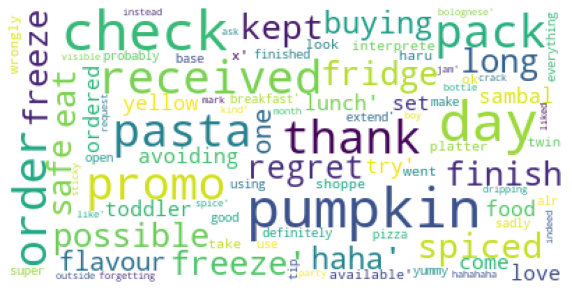

In [ ]:
# visualize word on postive and neutral sentiment
remove_words =['no','eye','deer','roasted','tomato','shiitake','sauce']
text = df_positive_sentiment['cleaned_text'].values.tolist()
viz_word (text, remove_words)

Most of the words are related to the product: pumpkin, pasta, order, promo, freeze, eat, etc. I expect more frequent words on customer experience like 'yummy', 'love', 'like' but we only have a few. Its only 26 data of roasted tomato and shiitake sauce we have in year 2020 afterall. 

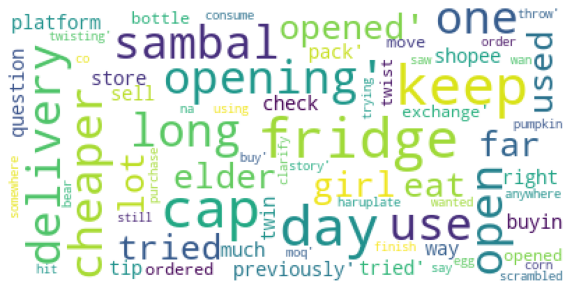

In [ ]:
text = df_neutral_sentiment['cleaned_text'].values.tolist()
viz_word (text, remove_words)

###3.2 Product Use Analysis

As it's food product, customer will use the product to cook or eat. So from the word visualization above, we will filter data which contains word related to cook or eat : cook, eat, sambal, pasta, pumpkin, lunch, egg, pizza.

In [ ]:
# filter messages where text contains 'cook, eat, sambal, pasta, pumpkin, lunch, egg, pizza'
df_convo_noeyedeer['text'].loc[(df_convo_noeyedeer["cleaned_text"].str.contains("cook|eat|sambal|pasta|pumpkin|lunch|egg|pizza", na=False))]

1646                                                                                                                                      only didi has tried the tomato sambal so far! my elder girl used to eat a lot of the tomato and shiitake sauce previously! :)
2534     hi..i see that the spiced pumpkin and roasted tomato sauces can be kept in fridge for about 3 to 5 days. i dont think i will.be able to finish within 3 to 5 days. is it possible to freeze the sauce? will it be safe to eat? how long can i freeze them for?
3567                                                                                                         yes i got all in each flavour! except for the pumpkin one bc we're avoiding yellow food for asher😆 he's going to have the roasted tomato sauce for lunch!!
4600                                                                                                                                                                                 thank you!  yes, my toddler

Some messages give us insight on how customer use the product:
>> "...it'll probably make a good base for pizza breakfast"

>>"...we have been using the no eye deer for almost everything!"

>>"...if the roasted tomato n shiitake sauce for pasta?like bolognese?"



